In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from scipy.signal import find_peaks
from scipy.stats import linregress

from scipy import stats

In [387]:
mass = np.array([5, 10, 20, 35, 50, 75])*1e-3  # masa (g)
#hemos usado estas masas porque las masas más pequeñas tenían mucho ruido y las muy grandes
#100 gramos bajaban demasiado causando problemas al detector de posición
periodos = [0.557, 0.733,0.912, 1.033, 1.248]
omegas = []

In [ ]:

# Función para calcular el periodo a partir de los cruces por cero
def calcular_periodo(x, y):
    # Buscar los picos (máximos locales) y los valles (mínimos locales)
    picos, _ = find_peaks(y)
    valles, _ = find_peaks(-y)  # Invertimos para encontrar los valles

    # Los picos y los valles deberían alternarse, por lo que tomamos los picos y valles consecutivos
    periodos = []
    for i in range(1, len(picos)):
        periodo = x[picos[i]] - x[picos[i - 1]]  # Tiempo entre dos picos consecutivos
        periodos.append(periodo)
    for i in range(1, len(valles)):
        periodo = x[valles[i]] - x[valles[i - 1]]  # Tiempo entre dos valles consecutivos
        periodos.append(periodo)

    # Calcular el periodo medio
    periodo_promedio = np.mean(periodos)
    
    return periodo_promedio


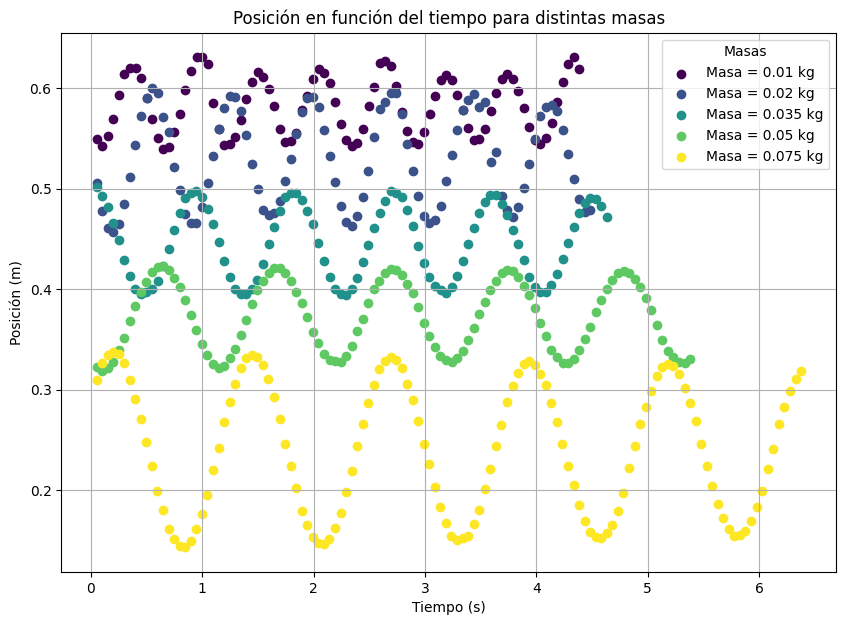

In [389]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Definir las rutas de los archivos
data_pos = [f"data/position_{i}.txt" for i in range(2, 7)]

# Definir las masas correspondientes (asociadas a los archivos)
mass = np.array([10, 20, 35, 50, 75]) * 1e-3  # masa en kg

# Crear un mapa de colores
colors = plt.cm.viridis(np.linspace(0, 1, len(data_pos)))

plt.figure(figsize=(10, 7))

# Iterar sobre los archivos y graficar
for i, file in enumerate(data_pos):
    if os.path.exists(file):  # Verificar que el archivo existe
        # Cargar los datos del archivo
        data = np.loadtxt(file)
        x = data[:, 0]  # Tiempo (s)
        y = data[:, 1]  # Fuerza (N)
        
        # Graficar los datos como puntos sin unir
        plt.scatter(x, y, label=f"Masa = {mass[i]} kg", color=colors[i])

# Personalizar la gráfica
plt.title("Posición en función del tiempo para distintas masas")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.legend(title="Masas")
plt.grid(True)
plt.show()


Para la masa 0.01 kg: pendiente = -1.60 ± 0.10, intercepto = -0.80
Para la masa 0.02 kg: pendiente = -1.88 ± 0.09, intercepto = -0.96
Para la masa 0.035 kg: pendiente = -1.52 ± 0.05, intercepto = -0.72
Para la masa 0.05 kg: pendiente = -2.02 ± 0.05, intercepto = -1.00
Para la masa 0.075 kg: pendiente = -1.85 ± 0.03, intercepto = -0.91
Para el experimento estático: pendiente = -1.87 ± 0.02, intercepto = -1.00


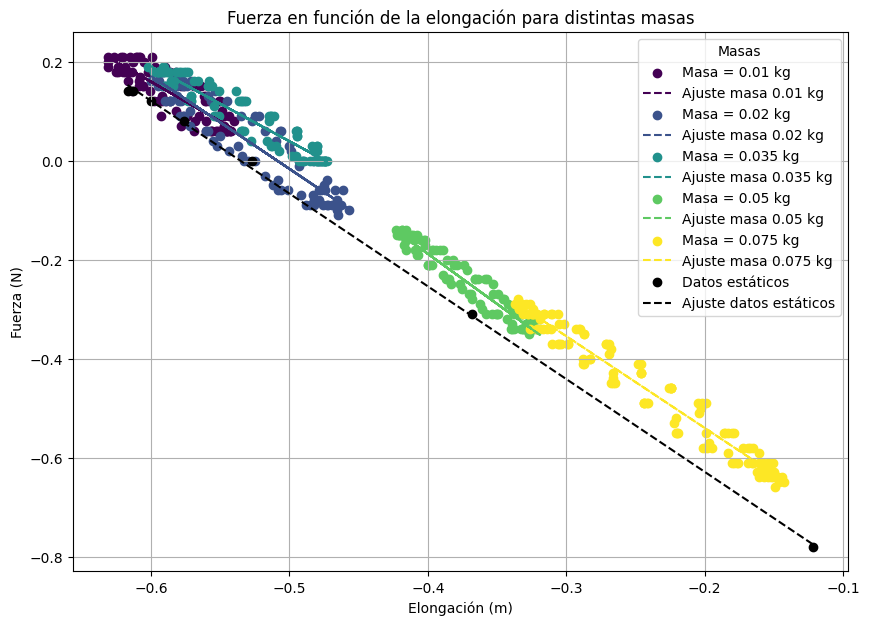

In [390]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las rutas de los archivos
data_pos = [f"data/position_{i}.txt" for i in range(2, 7)]
data_force = [f"data/force_{i}.txt" for i in range(2,7)]

# Definir las masas correspondientes (asociadas a los archivos)
mass = np.array([10, 20, 35, 50, 75]) * 1e-3  # masa en kg

# Crear un mapa de colores
colors = plt.cm.viridis(np.linspace(0, 1, len(data_pos)))

plt.figure(figsize=(10, 7))

# Iterar sobre los archivos y graficar
for i in range(len(data_pos)):
    # Cargar los datos de posición y fuerza
    pos_data = np.loadtxt(data_pos[i])  # Cargar datos de posición
    force_data = np.loadtxt(data_force[i])  # Cargar datos de fuerza
    
    # Extraer la columna de tiempo y posición para la gráfica
    time_pos = pos_data[:, 0]
    elongation = -pos_data[:, 1]  # Elongación = -posición
    if i == 2:
        elongation += elongation / 5
    
    # Extraer la columna de tiempo y fuerza para la gráfica
    time_force = force_data[:, 0]
    force = force_data[:, 1]
    
    # Graficar los datos de elongación vs. fuerza (invertido)
    plt.scatter(elongation, force, label=f"Masa = {mass[i]} kg", color=colors[i])
    
    # Ajuste lineal para cada conjunto de datos (fuerza vs elongación)
    coef, cov_matrix = np.polyfit(elongation, force, 1, full=False, cov=True)  # Ajuste lineal: y = ax + b
    pendiente, intercepto = coef
    varianza_pendiente = cov_matrix[0, 0]  # Varianza de la pendiente
    error_pendiente = np.sqrt(varianza_pendiente)  # Desviación estándar de la pendiente
    print(f"Para la masa {mass[i]} kg: pendiente = {pendiente:.2f} ± {error_pendiente:.2f}, intercepto = {intercepto:.2f}")
    
    # Evaluar la recta ajustada
    ajuste = np.polyval(coef, elongation)
    
    # Graficar la recta ajustada
    plt.plot(elongation, ajuste, color=colors[i], linestyle='--', label=f"Ajuste masa {mass[i]} kg")

# Datos adicionales para el punto 1 (punto de ejemplo)
grams = np.array([1, 2, 5, 10, 20, 50, 100])  # masa (g)
y = np.array([0.617, 0.613, 0.600, 0.576, 0.527, 0.368, 0.122])  # posición (m)
force = np.array([0.14, 0.14, 0.12, 0.08, 0.00, -0.31, -0.78])  # fuerza (N)
elongation = -y  # Elongación

# Graficar el punto adicional
plt.scatter(elongation, force, label=f"Datos estáticos", color="black")

# Ajuste lineal para el conjunto de datos estáticos
coef, cov_matrix = np.polyfit(elongation, force, 1, full=False, cov=True)  # Ajuste lineal: y = ax + b
pendiente, intercepto = coef
varianza_pendiente = cov_matrix[0, 0]  # Varianza de la pendiente
error_pendiente = np.sqrt(varianza_pendiente)  # Desviación estándar de la pendiente
print(f"Para el experimento estático: pendiente = {pendiente:.2f} ± {error_pendiente:.2f}, intercepto = {intercepto:.2f}")

# Evaluar la recta ajustada
ajuste = np.polyval(coef, elongation)

# Graficar la recta ajustada para los datos estáticos
plt.plot(elongation, ajuste, color="black", linestyle='--', label=f"Ajuste datos estáticos")

# Personalizar la gráfica
plt.title("Fuerza en función de la elongación para distintas masas")
plt.xlabel("Elongación (m)")  # Eje X: elongación
plt.ylabel("Fuerza (N)")  # Eje Y: fuerza
plt.legend(title="Masas")
plt.grid(True)
plt.show()


In [391]:
periodos = np.array(periodos)
periodos_squared = periodos**2
omega_squared = (4*np.pi)/periodos_squared
mass_inversed = 1/mass
print(periodos)

[0.557 0.733 0.912 1.033 1.248]


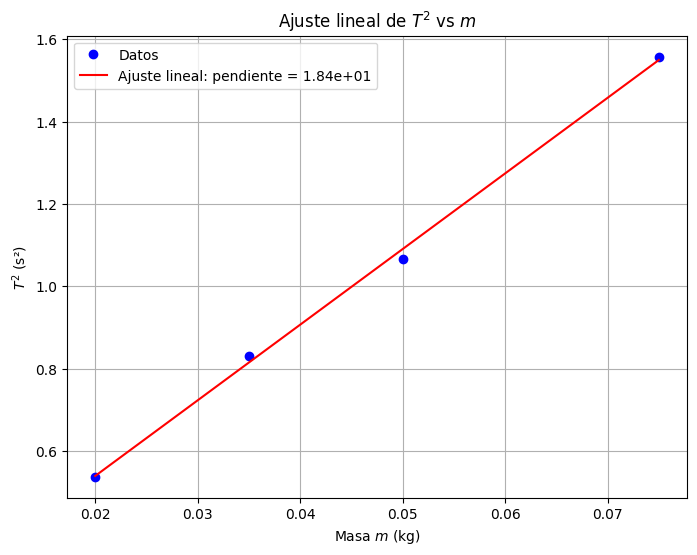

Valor de k usando $T^2$ vs $m$: k = 2.15 N/m


In [392]:
# Ajuste lineal de T^2 vs m
pendiente, intercepto = np.polyfit(mass[1:], periodos_squared[1:], 1)

# Crear la línea de ajuste
ajuste_lineal = np.polyval([pendiente, intercepto], mass)

# Gráfica del ajuste lineal
plt.figure(figsize=(8, 6))
plt.plot(mass[1:], periodos_squared[1:], 'bo', label="Datos")
plt.plot(mass[1:], ajuste_lineal[1:], 'r-', label=f"Ajuste lineal: pendiente = {pendiente:.2e}")

plt.title("Ajuste lineal de $T^2$ vs $m$")
plt.xlabel("Masa $m$ (kg)")
plt.ylabel("$T^2$ (s²)")
plt.legend()
plt.grid(True)
plt.show()

# Cálculo de k
k_T2_vs_m = 4 * np.pi**2 / pendiente
print(f"Valor de k usando $T^2$ vs $m$: k = {k_T2_vs_m:.2f} N/m")


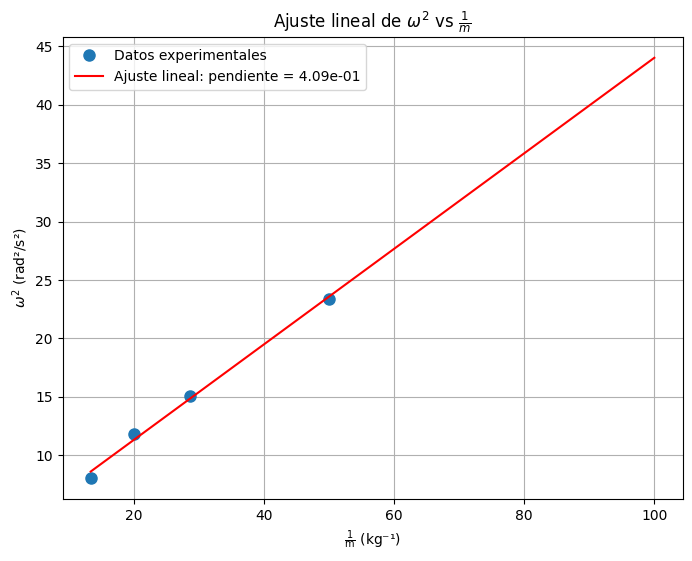

Valor de k usando $\omega^2$ vs $1/m$: k = 0.41 N/m


In [393]:
# Ajuste lineal de ω^2 vs 1/m
slope, intercept, r_value, p_value, std_err = linregress(mass_inversed[1:], omega_squared[1:])

# Gráfica del ajuste lineal
plt.figure(figsize=(8, 6))
plt.plot(mass_inversed[1:], omega_squared[1:], 'o', label="Datos experimentales", markersize=8)
plt.plot(
    mass_inversed, 
    slope * mass_inversed + intercept, 
    'r-', 
    label=f"Ajuste lineal: pendiente = {slope:.2e}"
)

plt.title(r"Ajuste lineal de $\omega^2$ vs $\frac{1}{m}$")
plt.xlabel(r"$\frac{1}{\text{m}}$ (kg⁻¹)")
plt.ylabel(r"$\omega^2$ (rad²/s²)")
plt.legend()
plt.grid(True)
plt.show()

# Cálculo de k
k_omega2_vs_1m = slope  # Directamente la pendiente es k
print(f"Valor de k usando $\omega^2$ vs $1/m$: k = {k_omega2_vs_1m:.2f} N/m")
